<a href="https://colab.research.google.com/github/riddhipatel09/AI-ML/blob/main/SMS_Spam_Classifier_using_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Load dataset from public URL (tab-separated file)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"

df = pd.read_csv(url, sep="\t", header=None, names=["label", "message"])

print("First 5 rows of the SMS dataset:")
df.head()


First 5 rows of the SMS dataset:


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df["label_num"] = df["label"].map({"ham": 0, "spam": 1})

X = df["message"]
y = df["label_num"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [6]:
vectorizer = CountVectorizer()

X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


In [7]:
print("Training the Multinomial Naive Bayes model...")

model = MultinomialNB()
model.fit(X_train_counts, y_train)

print("Model training complete.")


Training the Multinomial Naive Bayes model...
Model training complete.


In [8]:
# Make predictions
y_pred = model.predict(X_test_counts)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))



Model Accuracy: 0.9885

Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99      1207
        Spam       0.98      0.94      0.96       186

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



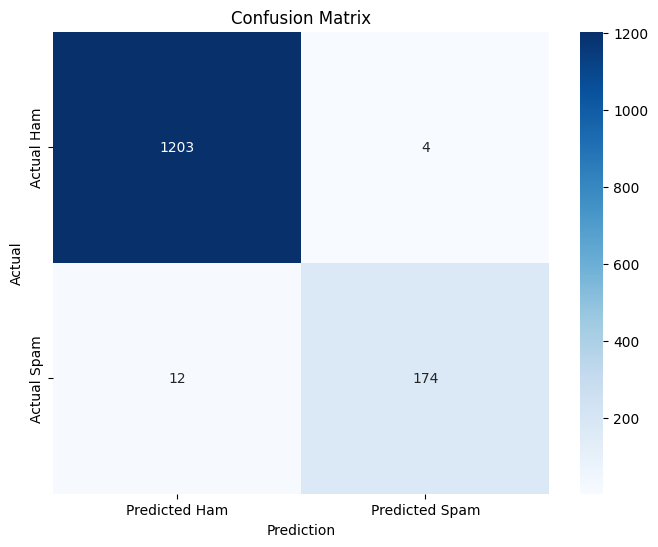

In [9]:
plt.figure(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted Ham", "Predicted Spam"],
    yticklabels=["Actual Ham", "Actual Spam"]
)

plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()
